In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
data = keras.datasets.fashion_mnist

In [6]:
# Loading the datasets & Splitting into train data and test data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [16]:
# Labels of the output
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [17]:
# Normalizing the train data & test data
train_images = keras.utils.normalize(train_images, axis=1)
test_images = keras.utils.normalize(test_images, axis=1)

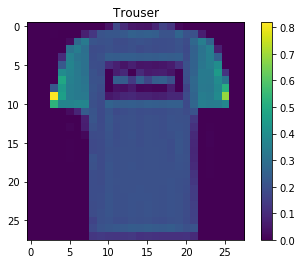

In [22]:
# Visualization of some images
plt.figure()
plt.title(class_names[1])
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

In [11]:
# Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2079 - acc: 0.9206
Epoch 2/10
 4224/60000 [=>............................] - ETA: 4s - loss: 0.1901 - acc: 0.9287

In [27]:
# Evaluate the model to find loss & accuracy
loss, acc = model.evaluate(test_images, test_labels)
print(f'loss: {loss}')
print(f'accuracy: {acc}')

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3303 - acc: 0.8840
loss: 0.3302853447437286
accuracy: 0.8840000033378601
